In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic = titanic.drop(['alive', 
                        'adult_male', 
                        'pclass', 
                        'embarked'], axis=1)
titanic.rename(columns={'embark_town': 'embarked'}, inplace=True)

In [8]:
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')

In [10]:
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,who,embarked,alone
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,True


In [11]:
from sklearn.preprocessing import LabelEncoder
titanic_encoded = titanic.copy()
for label in ['sex', 'class', 'who', 'embarked', 'alone']:
  titanic_encoded[label] = LabelEncoder().fit_transform(titanic_encoded[label])

In [14]:
titanic_encoded.astype(float).corr()

,survived,sex,age,sibsp,parch,fare,class,who,embarked,alone
survived,1.000000,-0.543351,-0.065571,-0.035322,0.081629,0.257307,-0.338481,0.325753,-0.172726,-0.203367
sex,-0.543351,1.000000,0.058415,-0.114631,-0.245489,-0.182333,0.131900,-0.639773,0.113807,0.303646
age,-0.065571,0.058415,1.000000,-0.206104,-0.165191,0.083417,-0.291157,0.328248,-0.024375,0.165588
sibsp,-0.035322,-0.114631,-0.206104,1.000000,0.414838,0.159651,0.083081,-0.136003,0.070111,-0.584471
parch,0.081629,-0.245489,-0.165191,0.414838,1.000000,0.216225,0.018443,-0.055682,0.041732,-0.583398
fare,0.257307,-0.182333,0.083417,0.159651,0.216225,1.000000,-0.549500,0.146290,-0.228364,-0.271832
class,-0.338481,0.131900,-0.291157,0.083081,0.018443,-0.549500,1.000000,-0.196793,0.168430,0.135207
who,0.325753,-0.639773,0.328248,-0.136003,-0.055682,0.146290,-0.196793,1.000000,-0.069670,0.006540
embarked,-0.172726,0.113807,-0.024375,0.070111,0.041732,-0.228364,0.168430,-0.069670,1.000000,0.059958
alone,-0.203367,0.303646,0.165588,-0.584471,-0.583398,-0.271832,0.135207,0.006540,0.059958,1.000000


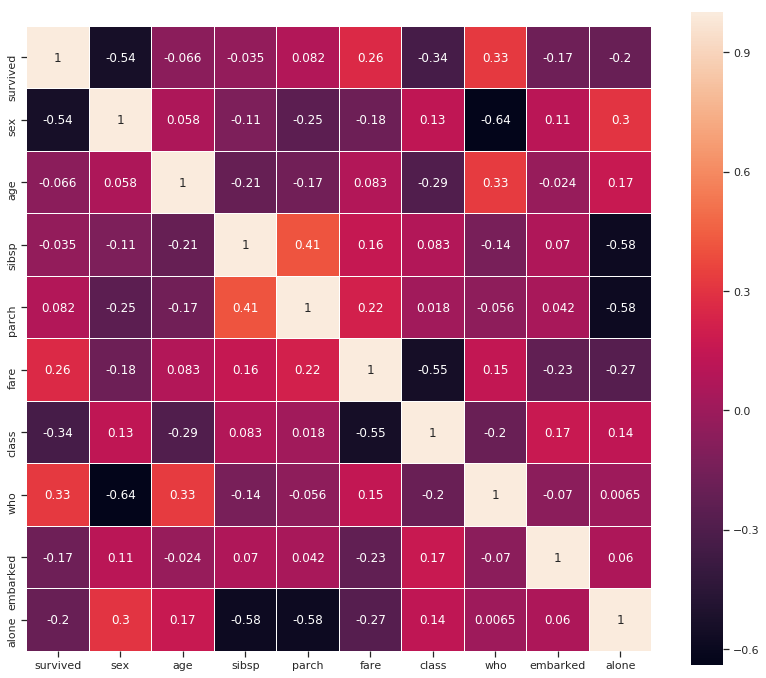

In [13]:
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(titanic_encoded.astype(float).corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()